In [55]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-20 17:06:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.2’

rockpaperscissors.z  18%[==>                 ]  57.51M  1.24MB/s    eta 79s    ^C


In [56]:
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/rockpaperscissors')
zip_ref.close()

os.remove('/rockpaperscissors/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')
base_dir = '/rockpaperscissors/rockpaperscissors/rps-cv-images'

In [57]:
os.listdir('/rockpaperscissors/rockpaperscissors/rps-cv-images')

['rock', 'scissors', 'paper']

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.4, fill_mode = 'nearest', rotation_range=15, horizontal_flip=True, shear_range = 0.2, zoom_range = 0.3)    

train_generator = image_generator.flow_from_directory(batch_size=32,
                                                 directory=base_dir,
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_generator = image_generator.flow_from_directory(batch_size=32,
                                                 directory=base_dir,
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [97]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(3, activation="softmax"))


In [121]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [122]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 36s - loss: 0.1295 - accuracy: 0.9571 - val_loss: 0.1554 - val_accuracy: 0.9375
Epoch 2/20
25/25 - 37s - loss: 0.1147 - accuracy: 0.9538 - val_loss: 0.0902 - val_accuracy: 0.9812
Epoch 3/20
25/25 - 35s - loss: 0.1902 - accuracy: 0.9338 - val_loss: 0.2159 - val_accuracy: 0.9312
Epoch 4/20
25/25 - 36s - loss: 0.1151 - accuracy: 0.9625 - val_loss: 0.1265 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 35s - loss: 0.1383 - accuracy: 0.9545 - val_loss: 0.2294 - val_accuracy: 0.9275
Epoch 6/20
25/25 - 35s - loss: 0.0812 - accuracy: 0.9688 - val_loss: 0.2714 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 36s - loss: 0.1089 - accuracy: 0.9663 - val_loss: 0.1824 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 35s - loss: 0.1123 - accuracy: 0.9636 - val_loss: 0.1150 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 36s - loss: 0.1167 - accuracy: 0.9613 - val_loss: 0.1606 - val_accuracy: 0.9438
Epoch 10/20
25/25 - 35s - loss: 0.1021 - accuracy: 0.9597 - val_loss: 0.1866 - val_accuracy: 0.9438
Epoch 11/

Saving WhatsApp Image 2021-07-21 at 12.53.07 AM.jpeg to WhatsApp Image 2021-07-21 at 12.53.07 AM (4).jpeg
paper


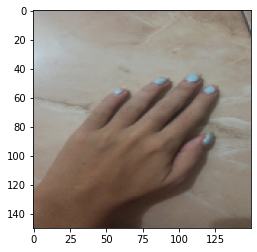

In [124]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  
  if output_class==0:
      print('paper')
  elif output_class==1:
      print('rock')
  else:
      print('scissors')

Name --> Laurenza Setiana Riva